# Importing dataset

This dataset was acquired from: https://www.kaggle.com/mirichoi0218/insurance/tasks?taskId=740

## Description

Columns:
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

**The goal is to accurately predict insurance costs**

# Import and Split Data into Train and Test

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('dataset/insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# checking if there's any null value
dataset.isnull().values.any()

False

In [4]:
# checking if there's any nan value
dataset.isna().values.any()

# can also use 
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
dataset.shape

(1338, 7)

In [6]:
# splitting data into train and test, 70 train and 30 test
data_train = dataset.sample(frac=0.7, random_state=46)
data_train.head()

,age,sex,bmi,children,smoker,region,charges
141,26,male,32.49,1,no,northeast,3490.5491
1065,42,female,25.30,1,no,southwest,7045.4990
467,56,female,33.82,2,no,northwest,12643.3778
557,34,male,34.21,0,no,southeast,3935.1799
166,20,female,37.00,5,no,southwest,4830.6300


In [7]:
data_train.shape

(937, 7)

In [8]:
data_test = dataset.drop(data_train.index)
data_test.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
5,31,female,25.74,0,no,southeast,3756.6216
14,27,male,42.13,0,yes,southeast,39611.7577
16,52,female,30.78,1,no,northeast,10797.3362
21,30,female,32.40,1,no,southwest,4149.7360


In [9]:
data_test.shape

(401, 7)

In [10]:
# reseting index, to start from 0 to N - 1
data_train.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)

# Setup the pycaret to use regression

In [14]:
from pycaret.regression import *

In [16]:
# passin data train, specifiying the normalization which removes the outliers using z-score
# the k-fold is 10
set = setup(data=data_train, normalize=True, target='charges')

,Description,Value
0,session_id,3247
1,Target,charges
2,Original Data,"(937, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(655, 14)"


In [17]:
# compare best models
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2632.4509,22488792.7578,4667.4313,0.8523,0.4631,0.3437,0.0510
lightgbm,Light Gradient Boosting Machine,2856.8069,23732936.3278,4823.3202,0.8430,0.5259,0.3821,0.0320
rf,Random Forest Regressor,2804.7608,24487958.5882,4895.5951,0.8380,0.4976,0.3700,0.3210
et,Extra Trees Regressor,2895.9502,28889697.5385,5301.1432,0.8092,0.5184,0.3745,0.2870
ada,AdaBoost Regressor,4672.6598,32087921.0430,5626.6050,0.7814,0.6807,0.8421,0.0270
llar,Lasso Least Angle Regression,4207.0016,37936980.4308,6120.1200,0.7465,0.5594,0.4209,0.0130
ridge,Ridge Regression,4224.7044,37956984.8000,6121.2941,0.7464,0.5475,0.4245,0.0120
br,Bayesian Ridge,4220.2054,37961131.9929,6121.7892,0.7464,0.5480,0.4236,0.0120
lr,Linear Regression,4208.1186,37981007.6000,6123.7679,0.7462,0.5528,0.4210,0.0120
lasso,Lasso Regression,4208.2199,37974153.8000,6123.2128,0.7462,0.5513,0.4210,0.0130


# Creating model

In [18]:
# creating a Light Gradient Boosting Machine which according to the metrics, was the second best, but
# since i want to use the shap interpretation graph, i'm going to use this decision tree based model
lgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2579.3683,17048305.4662,4128.9594,0.8817,0.5413,0.4763
1,2385.7602,18169381.0550,4262.5557,0.8255,0.3567,0.2568
2,3244.7597,33588251.7309,5795.5372,0.8381,0.5454,0.4455
3,2938.6929,22158700.9055,4707.3029,0.8291,0.6296,0.3679
4,3009.1761,27532083.0013,5247.1023,0.8327,0.5882,0.4311
5,2870.3064,22426608.5279,4735.6740,0.8558,0.5887,0.4235
6,2469.7364,14911054.5691,3861.4835,0.8906,0.4420,0.3275
7,3058.8794,32577992.1542,5707.7134,0.8122,0.5895,0.3960
8,2441.3406,17450306.1265,4177.3564,0.8632,0.3758,0.2921
9,3570.0485,31466679.7412,5609.5169,0.8012,0.6015,0.4043


###  Why it's important to tuning the model ? 

By tuning a Model we can generate a most accurate outcome.

In [19]:
# tune model to improve its hyperparameter
# Increasing the n_iter parameter may increase the training time but often results in a highly optimized model.
# this optmization uses by default a randomized grid search of a pre-defined search space
# the k-fold is by default 10
# k=10: The value for k is fixed to 10, a value that has been found through experimentation 
# to generally result in a model skill estimate with low bias a modest variance.
tuned_lgbm = tune_model(lgbm, n_iter = 50) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2155.9595,14139860.5321,3760.3006,0.9019,0.4591,0.3661
1,2478.0452,19124832.4781,4373.1948,0.8163,0.3862,0.2833
2,3088.1668,30683646.4123,5539.2821,0.8521,0.4983,0.3978
3,2657.9619,20456925.8482,4522.9333,0.8423,0.5240,0.3123
4,2828.0818,26949007.6521,5191.2434,0.8362,0.5587,0.3709
5,2519.8239,19328152.3942,4396.3795,0.8757,0.4857,0.3608
6,2283.2503,13879056.0057,3725.4605,0.8981,0.3871,0.2808
7,2899.7710,29927722.7449,5470.6236,0.8275,0.5408,0.3629
8,2234.2900,16093011.5491,4011.6096,0.8738,0.3442,0.2464
9,3326.5773,29962112.3741,5473.7658,0.8107,0.5146,0.3317


# Interprate Model

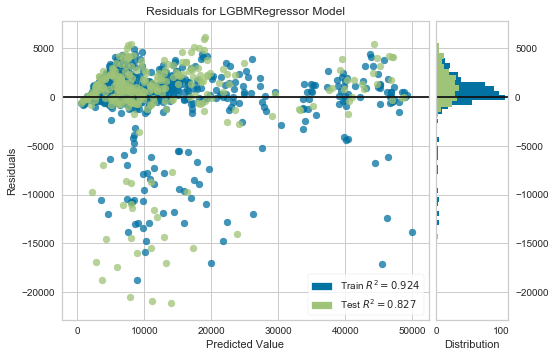

In [20]:
plot_model(tuned_lgbm)

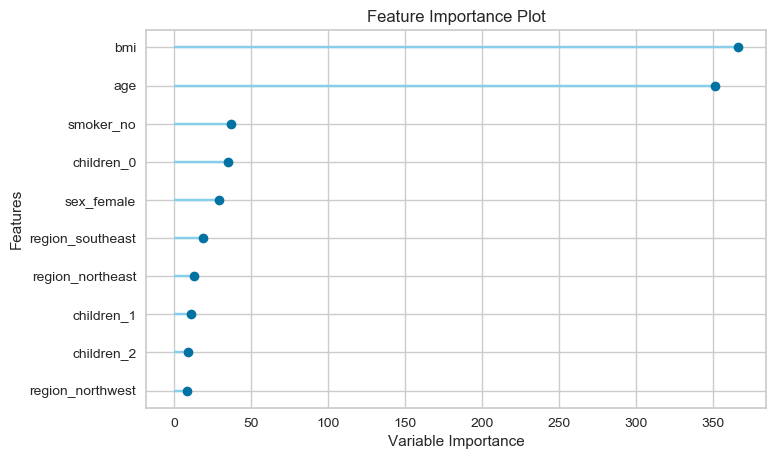

In [21]:
plot_model(tuned_lgbm, plot = 'feature')

**By interpret a model, we can analyze what is really important for the model**

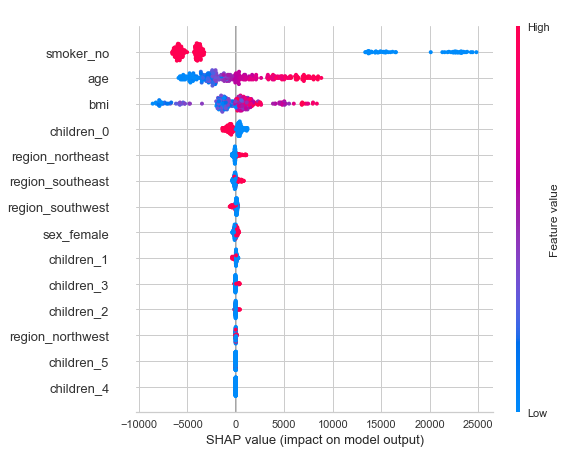

In [23]:
# this function only supports tree based models for binary classification:
# Extra Trees Regressor, Decision Tree, Light Gradient Boosting and Random Forest
# The features are ordered according to their importance
interpret_model(tuned_lgbm, 'summary')

# Predict Model

In [24]:
predict_model(tuned_lgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2759.5388,22887035.7636,4784.0397,0.8270,0.4590,0.3307


,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,-1.196002,-1.225321,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2731.912109,2820.606369
1,-1.478964,-0.061255,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1131.506592,3842.687983
2,0.572513,2.477615,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,8569.861328,7607.491135
3,0.855475,0.913819,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,9386.161133,9909.487279
4,-1.125261,0.744895,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4466.621582,6452.861413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,-0.134893,-1.304766,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,6985.506836,7911.428329
278,-1.196002,1.504214,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1682.597046,2804.598542
279,-1.478964,-0.526212,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,17178.681641,18810.676548
280,0.360291,0.999116,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,12797.209961,9194.366278


# Finalize Model


Finalize model is the last step in a typical supervised experiment workflow. When an experiment is started in PyCaret using setup, a hold-out set is created that is not being used in model training. By default, if no train_size parameter is defined in setup, hold-out set contains 30% sample of the dataset. All the functions in PyCaret use the remaining 70% as training set to create, tune or ensemble models. As such, the hold-out set is the final assurance and used for diagnosis of overfitting / underfitting. However, once the predictions are generated on hold-out set using predict_model and you have chosen to deploy the specific model, you want to train your model for one final time on the entire dataset including hold-out.

This function finalizes the process by training the model with the entire dataset

DOC: https://pycaret.org/finalize-model/

In [25]:
final_model = finalize_model(tuned_lgbm)

# Save Model

In [26]:
save_model(final_model, 'lgbm_health')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       float_dtype='float32', id_columns=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical='not_available',
                                 fill_valu...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.9,
                                importance_type='split', learning_rate=0.15,
                                max_depth=-1, min_child_samples=16,
             

# Load Model

In [27]:
model = load_model('lgbm_health')

Transformation Pipeline and Model Successfully Loaded


In [28]:
# Predicting in unseen data
results_dt = predict_model(tuned_lgbm, data=data_test)
results = pull()
results_dt.head()

,age,sex,bmi,children,smoker,region,charges,Label
0,18,male,33.77,1,no,southeast,1725.5523,3379.398234
1,31,female,25.74,0,no,southeast,3756.6216,4306.869886
2,27,male,42.13,0,yes,southeast,39611.7577,40207.633319
3,52,female,30.78,1,no,northeast,10797.3362,11652.351346
4,30,female,32.40,1,no,southwest,4149.7360,4416.903422


In [29]:
results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2759.5388,2.288704e+07,4784.0397,0.827,0.459,0.3307
